In [1]:
import warnings
import numpy as np
import numpy.linalg as la
import math as mt
import matplotlib.pyplot as plt
import sympy.plotting as pls
import seaborn as sns
import sympy as sp
from IPython.display import display, Math
from sympy.parsing.sympy_parser import parse_expr

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

# Soluciones Computacionales a Problemas de Ingeniería IST4360
## Ejercicio 1

Escriba un polinomio $p(x)$ tal que $|\text{sinc}(x)-p(x)|\leq 10^{-10}$ para $-0.2\leq x \leq 0.2$, donde

$$
\text{sinc} (x)=\begin{cases}
	\frac{\sin (x)}{x} & \text{ si } x\neq 0,\\
	\hfil 1 & \text{ si }  x=0
\end{cases}
$$
es la función "sinc" (usada en procesamiento de señales, etc). Muestre además que su polinomio $p$ cumple la condición $|\text{sinc}(x)-p(x)|\leq 10^{-10}$ para $x\in [-0.2,\, 0.2]$, grafique los errores teóricos y reales.

En este caso realizamos el procedimiento análogo al mostrado en clase donde para una función de finida a trozos hacemos uso de la función `Piecewise` de `sympy`.

In [2]:
help(sp.Piecewise)

Help on class Piecewise in module sympy.functions.elementary.piecewise:

class Piecewise(sympy.core.function.Function)
 |  Piecewise(*_args)
 |  
 |  Represents a piecewise function.
 |  
 |  Usage:
 |  
 |    Piecewise( (expr,cond), (expr,cond), ... )
 |      - Each argument is a 2-tuple defining an expression and condition
 |      - The conds are evaluated in turn returning the first that is True.
 |        If any of the evaluated conds are not explicitly False,
 |        e.g. ``x < 1``, the function is returned in symbolic form.
 |      - If the function is evaluated at a place where all conditions are False,
 |        nan will be returned.
 |      - Pairs where the cond is explicitly False, will be removed and no pair
 |        appearing after a True condition will ever be retained. If a single
 |        pair with a True condition remains, it will be returned, even when
 |        evaluation is False.
 |  
 |  Examples
 |  ========
 |  
 |  >>> from sympy import Piecewise, log, piec

In [3]:
x = parse_expr('x')
x0 = 0
f = sp.Piecewise(
    (sp.sin(x)/x, x != 0),
    (1, True)
)

In [4]:
errors = list()
pol_deg = list(range(2,15))
for ni in pol_deg:
  errors.append(np.abs(float(f.subs(x,0.1) - sp.series(expr=f,x=x,x0=x0, n=ni).removeO().subs(x,0.1).evalf())))

print(errors)

[0.0016658335317184525, 8.331349482526562e-07, 8.331349482526562e-07, 1.9838508613645445e-10, 1.9838508613645445e-10, 2.7644553313166398e-14, 2.7644553313166398e-14, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16]


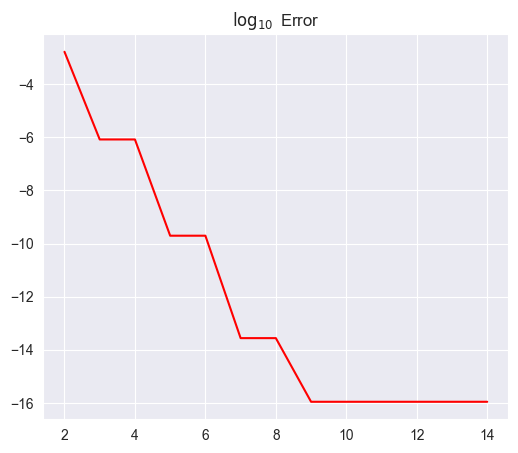

In [5]:
fig, ax1 = plt.subplots(figsize=(6,5))

ax1.plot(pol_deg,np.log10(errors), color = 'r')
ax1.set_title('$\log_{10}$ Error');

Por lo tanto a partir de $n=6$ podemos decir que el error será menor a $10^{-10}$.

## Ejercicio 2
Halle las fórmulas de diferencias progresivas, regresivas y centrales para cualquier $f\in \mathcal{C}^{4} [a,b]$ tal que para $x_{0}\in (a,b)$ se tenga $\mathcal{O} (h^3)$. Luego, considere $f(x)=x\ln (x)$ y calcule $f'(1)$ para distintos valores de $h$, grafique los errores e indique qué valor de $h$ minimiza el error.

Haciendo uso del Teorema de Taylor tenemos las siguientes igualdades para $x=x_0+kh$, con $k=1,2,3$ 
$$f(x_{0}+h)=f{\left(x_{0} \right)} + h f'(x_{0}) + \frac{h^{2}}{2}f''(x_{0}) + \frac{h^{3}}{6} f'''(x_{0}) + O\left(h^{4}\right)
\\f(x_{0}+2h)=f{\left(x_{0} \right)} + 2 h f'(x_{0}) + 2 h^{2} f''(x_{0}) + \frac{4 h^{3}}{3}f'''(x_{0}) + O\left(h^{4}\right)
\\f(x_{0}+3h)=f{\left(x_{0} \right)} + 3 h f'(x_{0}) + \frac{9 h^{2}}{2}f''(x_{0}) + \frac{9 h^{3}}{2}f'''(x_{0}) + O\left(h^{4}\right)$$
Con lo anterior nos interesa encontrar una combinación lineal tal los terminos $f''$ y $f'''$ desaparezcan y que además se garantice que $f'$ se mantenga. Es decir que nos interesan encontrar constantes $a,b,c$ tales que se obtenga la siguiente combinación lineal
$$(a + 2b  + 3c ) f'(x_{0}) +  \left (\frac{a}{2} + 2 b+ \frac{9c }{2} \right ) f''(x_{0})  + \left (\frac{a}{6}  + \frac{4 b}{3} + \frac{9c}{2} \right )f'''(x_{0}) = f'(x_0)$$
Esto visto de forma matricial sería
\begin{gather}
\begin{bmatrix}
1 & 2 & 3\\
1/2 & 2 & 4/3\\
1/6 & 4/3 & 9/2
\end{bmatrix}
\begin{bmatrix}
a\\
b\\
c
\end{bmatrix}
=
\begin{bmatrix}
1\\
0\\
0
\end{bmatrix}
\end{gather}
El cual es un sistema que podemos resolver fácilmente con la ayuda de la función `solve` de `numpy.linalg` en Python

In [6]:
coeff_Matrix = np.array([
    [1, 2, 3],
    [1/2, 2, 9/2],
    [1/6, 4/3, 9/2]
])
# print(coeff_Matrix)
constants=la.solve(coeff_Matrix,np.array([1,0,0]))
# print(constants)
a, b, c = constants

In [7]:
x,x0,h = parse_expr('x,x0,h')
f = parse_expr('f(x)')
n=4

In [8]:
f1 =f.subs(x,x0+h)-sp.series(expr=f,x=x,x0=x0,n=n).subs(x,x0+h)
display(f1)
f2 =f.subs(x,x0+2*h)-sp.series(expr=f,x=x,x0=x0,n=n).subs(x,x0+2*h)
display(f2)
f3 =f.subs(x,x0+3*h)-sp.series(expr=f,x=x,x0=x0,n=n).subs(x,x0+3*h)
display(f3)

f(h + x0) - f(x0) - h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x0) - h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, x0)/2 - h**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, x0)/6 + O(h**4)

f(2*h + x0) - f(x0) - 2*h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x0) - 2*h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, x0) - 4*h**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, x0)/3 + O(h**4)

f(3*h + x0) - f(x0) - 3*h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x0) - 9*h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, x0)/2 - 9*h**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, x0)/2 + O(h**4)

In [9]:
F0=a*f1+b*f2+c*f3
F1 = sp.nsimplify(F0,tolerance=0.001,rational=True)

In [10]:
display(Math(sp.latex(F1).replace('\\left. \\frac{d}{d \\xi_{1}} f{\\left(\\xi_{1} \\right)} \\right|_{\\substack{ \\xi_{1}=x_{0} }}',"f'(x_{0})")+'=0'))

<IPython.core.display.Math object>

$$f'(x_{0}) = \frac{2f(x_{0}+3h)-9f(x_{0}+2h)+18f(x_{0}+h)-11f(x_{0})}{6h} + O\left(h^{3}\right)$$

De manera similar encontramos la fórmula para diferencias regresivas. Una vez encontrada esta fórmula podemos hacer uso de esta para encontrar el valor de la derivada y qué $h$ minimiza el error.

In [11]:
f = parse_expr('x*ln(x)')

In [12]:
df_real = float(f.diff().subs('x',1).evalf())
df = lambda x,h: float(((2*f.subs('x', x+3*h)-9*f.subs('x', x+2*h)+18*f.subs('x', x+h)-11*f.subs('x', x))/(6*h)).evalf())

In [13]:
powers = [k for k in range(-10,0)]
error = [abs(df_real-df(1,10**k))/df_real for k in powers]

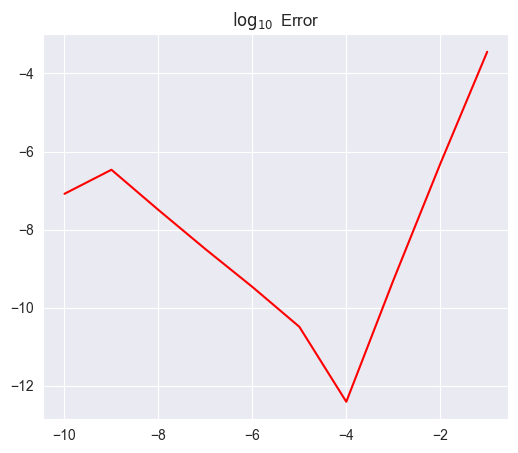

In [14]:
fig, ax1 = plt.subplots(figsize=(6,5))

ax1.plot(powers,np.log10(error),color='r')
ax1.set_title('$\log_{10}$ Error');

Por lo tanto un $h=10^{-4}$ minimiza el error para este caso.

## Ejercicio 3
Considere la función $f(x) = x\sin (x)$, grafique en un solo lienzo a $f$ y los polinomios de Taylor de grado $n=1,2,...,6$ para $x_{0}\in (-5\pi,5\pi)$.

In [15]:
x = parse_expr('x')
f = parse_expr('x*sin(x)')
x0 = 0

In [16]:
max_n = 8
p = [sp.series(expr=f, x=x, x0=x0, n=ni).removeO() for ni in range(2,max_n)]
n_pol=len(p)

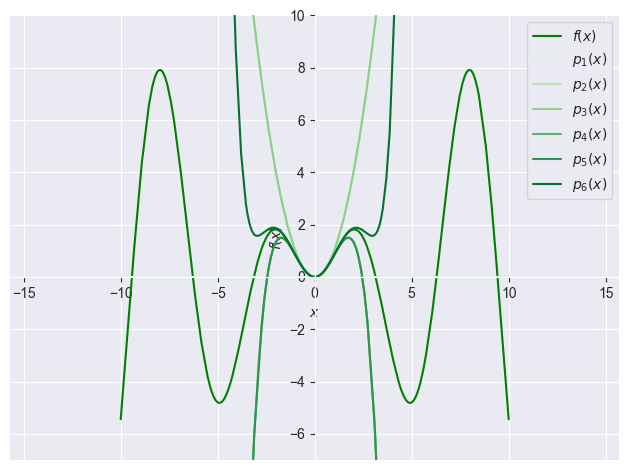

In [17]:
sns.set_style('darkgrid')
cmap = sns.color_palette('Greens', n_pol)
fig = pls.plot(f,xlim=[-5*mt.pi,5*mt.pi],ylim=[-7,10], line_color='g', show=False)
labs = ['$f(x)$']
for n in range(n_pol):
  c = cmap[n]
  labs.append(f'$p_{n+1}(x)$')
  fig.extend(pls.plot(p[n],xlim=[-5*mt.pi,5*mt.pi],ylim=[-7,10], line_color=c, show=False))
for n in range(n_pol+1): fig[n].label = labs[n]
fig.legend = True
fig.show()

**Nota:** Por favor incluir en el archivo que contenga la solución los script, funciones, gráficas, código y cualquier otro elemento utilizado. No coloque respuestas sin justificación, muestre todo los desarrollos.

**Recuerde:** En este curso no se tolerará el plagio. Sin excepción, en caso de presentarse esta situación, a los estudiantes involucrados se les iniciará proceso de investigación, y se actuará en conformidad con el Reglamento de Estudiantes de la Universidad del Norte. El plagio incluye: usar contenidos sin la debida referencia, de manera literal o con mínimos cambios que no alteren el espíritu del texto/código; adquirir con o sin intención, trabajos de terceros y presentarlos parcial o totalmente como propios; presentar trabajos en grupo donde alguno de los integrantes no trabajó o donde no se hubo trabajo en equipo demostrable; entre otras situaciones definidas en el manual de fraude académico de la Universidad del Norte ([pdf](https://guayacan.uninorte.edu.co/normatividad_interna/upload/File/Guia_Prevencion_Fraude%20estudiantes(5).pdf)).